In [2]:
import numpy as np
import pandas as pd

ESS_data = pd.read_csv("C:/Users/grego/Desktop/dataset/ESS11.csv", low_memory=False)


In [3]:
df = ESS_data[[
    "imsmetn", "imdfetn", "impcntr",
"ipcrtiva","impricha","ipeqopta","ipshabta",
"impsafea","impdiffa","ipfrulea","ipudrsta","ipmodsta","ipgdtima",
"impfreea","iphlppla","ipsucesa","ipstrgva","ipadvnta",
"ipbhprpa","iprspota","iplylfra","impenva","imptrada","impfuna",


    "gndr", "brncntr", "maritalb", "domicil",
    "eisced", "hincfel", "pdwrk",
    "agea", "lrscale", "rlgdgr", "hhmmb",
    "polintr",
    
    "trstprl", "trstlgl", "trstplc", "trstplt", "trstprt", "trstep", "trstun", "ppltrst",
    "feethngr", "cntry"
]].copy()


In [4]:
# === Questions needed to calculate the target variable ===
#imsmetn: Now, using this card, to what extent do you think [country] should allow people of the same race or ethnic group as most [country]'s people to come and live here?
#imdfetn: How about people of a different race or ethnic group from most [country] people?
#impcntr: How about people from the poorer countries outside Europe?

#1	Allow many to come and live here
#2	Allow some
#3	Allow a few
#4	Allow none
#7	Refusal*
#8	Don't know*
#9	No answer*
#*) Missing Value - all the questions with '*' are considered missing values according to ESS codebook

#unique values
print("Unique values in imsmetn:", df["imsmetn"].unique())
print("Unique values in imdfetn:", df["imdfetn"].unique())
print("Unique values in impcntr:", df["impcntr"].unique())

#changing invalid responses to None
cols = ["imsmetn", "imdfetn", "impcntr"]
df[cols] = df[cols].replace([7, 8, 9, "7", "8", "9"], None)
print('====================')
print("Unique values in imsmetn:", df["imsmetn"].unique())
print("Unique values in imdfetn:", df["imdfetn"].unique())
print("Unique values in impcntr:", df["impcntr"].unique())





Unique values in imsmetn: [2 1 4 3 7 8 9]
Unique values in imdfetn: [2 1 3 4 7 8 9]
Unique values in impcntr: [3 2 1 4 7 8 9]
Unique values in imsmetn: [2 1 4 3 None]
Unique values in imdfetn: [2 1 3 4 None]
Unique values in impcntr: [3 2 1 4 None]


In [5]:
#### EXPLORING PREDICTORS
## CATEGORICAL VARIABLES
#1 - gndr: Gender

## Checking unique values
print("Unique values in gndr before recoding:", df["gndr"].unique())

# Renaming column to Gender
df = df.rename(columns={"gndr": "Gender"})

# Replacing numeric codes with text labels
df["Gender"] = df["Gender"].replace({ 1: "Male", 2: "Female"})

# Converting to categorical data type
df["Gender"] = df["Gender"].astype("category")

# Checking values after recoding
print("Unique values in Gender after recoding:", df["Gender"].unique())


Unique values in gndr before recoding: [1 2]
Unique values in Gender after recoding: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']


In [6]:
# cntry - Country code of respondent
# ==============================================================

# Checking unique country codes
print("Unique values in cntry:", df["cntry"].unique())
df = df.rename(columns={"cntry": "Country"})
df["Country"] = df["Country"].replace({"AT":"Austria","BE":"Belgium","BG":"Bulgaria","CH":"Switzerland","CY":"Cyprus","DE":"Germany","ES":"Spain",
                                       "FI":"Finland","FR":"France","GB":"United Kingdom","GR":"Greece","HR":"Croatia","HU":"Hungary","IE":"Ireland",
                                       "IL":"Israel","IS":"Iceland","IT":"Italy","LT":"Lithuania","LV":"Latvia","ME":"Montenegro","NL":"Netherlands",
                                       "NO":"Norway","PL":"Poland","PT":"Portugal","RS":"Serbia","SE":"Sweden","SI":"Slovenia","SK":"Slovakia"})

df = df[df["Country"] != "Israel"]




Unique values in cntry: ['AT' 'BE' 'BG' 'CH' 'CY' 'DE' 'ES' 'FI' 'FR' 'GB' 'GR' 'HR' 'HU' 'IE'
 'IL' 'IS' 'IT' 'LT' 'LV' 'ME' 'NL' 'NO' 'PL' 'PT' 'RS' 'SE' 'SI' 'SK']


In [7]:
#brncntr - Were you born in [country]?
# ============================================================
# 1 = Yes
# 2 = No
# 7 = Refusal*
# 8 = Don't know*
# 9 = No answer*

# Checking unique values
print("Unique values in brncntr before recoding:", df["brncntr"].unique())

df = df.rename(columns={"brncntr": "Born_in_Country"})

# Replacing numeric codes with descriptive labels
df["Born_in_Country"] = df["Born_in_Country"].replace({1:"Yes", 2:"No", 7:None, 8:None, 9:None})

# Converting to categorical data type
df["Born_in_Country"] = df["Born_in_Country"].astype("category")
# Checking values after recoding
print("Unique values in Born_in_Country after recoding:", df["Born_in_Country"].unique())


Unique values in brncntr before recoding: [1 2 7 8 9]
Unique values in Born_in_Country after recoding: ['Yes', 'No', NaN]
Categories (2, object): ['No', 'Yes']


In [8]:
# maritalb: Marital status

## Checking unique values
print("Unique values in maritalb before recoding:", df["maritalb"].unique())

# Renaming column to Marital_Status
df = df.rename(columns={"maritalb": "Marital_Status"})

# Replacing numeric codes with labels
df["Marital_Status"] = df["Marital_Status"].replace({
    1: "Legally married",
    2: "In a legally registered civil union",
    3: "Legally separated",
    4: "Legally divorced/Civil union dissolved",
    5: "Widowed/Civil partner died",
    6: "None of these (never married or in legally registered civil union)",
    77: None,  # Refusal
    88: None,  # Don't know
    99: None   # No answer
})

# Converting to categorical data type
df["Marital_Status"] = df["Marital_Status"].astype("category")

# Checking values after recoding
print("Unique values in Marital_Status after recoding:", df["Marital_Status"].unique())


Unique values in maritalb before recoding: [ 1  6  4  5  2 77 88 99  3]
Unique values in Marital_Status after recoding: ['Legally married', 'None of these (never married or in legally re..., 'Legally divorced/Civil union dissolved', 'Widowed/Civil partner died', 'In a legally registered civil union', NaN, 'Legally separated']
Categories (6, object): ['In a legally registered civil union', 'Legally divorced/Civil union dissolved', 'Legally married', 'Legally separated', 'None of these (never married or in legally re..., 'Widowed/Civil partner died']


In [9]:
#3 - domicil: Which phrase on this card best describes the area where you live?

## Checking unique values
print("Unique values in domicil before recoding:", df["domicil"].unique())

# Renaming column to Domicile
df = df.rename(columns={"domicil": "Domicile"})
# Replacing numeric codes with descriptive labels
df["Domicile"] = df["Domicile"].replace({
    1: "A big city",
    2: "Suburbs or outskirts of big city",
    3: "Town or small city",
    4: "Country village",
    5: "Farm or home in countryside",
    7: None,  # Refusal
    8: None,  # Don't know
    9: None   # No answer
})

# Converting to categorical data type
df["Domicile"] = df["Domicile"].astype("category")

# Checking values after recoding
print("Unique values in Domicile after recoding:", df["Domicile"].unique())


Unique values in domicil before recoding: [3 1 4 5 2 8 7 9]
Unique values in Domicile after recoding: ['Town or small city', 'A big city', 'Country village', 'Farm or home in countryside', 'Suburbs or outskirts of big city', NaN]
Categories (5, object): ['A big city', 'Country village', 'Farm or home in countryside', 'Suburbs or outskirts of big city', 'Town or small city']


In [10]:
# Eisced: Education level (ES-ISCED classification)
  #0:  "Not possible to harmonise into ES-ISCED",
  #1:  "ES-ISCED I, less than lower secondary",
  #2:  "ES-ISCED II, lower secondary",
  #3:  "ES-ISCED IIIb, lower tier upper secondary",
  #4:  "ES-ISCED IIIa, upper tier upper secondary",
  #5:  "ES-ISCED IV, advanced vocational, sub-degree",
  #6:  "ES-ISCED V1, lower tertiary education (BA level)",
  #7:  "ES-ISCED V2, higher tertiary education (≥ MA level)",
  #55: "Other"
  #77: Refusal*
  #88: Don't know*
  #99: No answer*

## Checking unique values
print("Unique values in eisced before recoding:", df["eisced"].unique())

# Renaming column to Education_Level
df = df.rename(columns={"eisced": "Education_Level"})

# Replacing numeric codes with descriptive labels and shorter names to better visualisation
df["Education_Level"] = df["Education_Level"].replace({
    0:  "Not possible to harmonise into ES-ISCED",
    1:  "Less than lower secondary",
    2:  "Lower secondary",
    3:  "Lower tier upper secondary",
    4:  "Upper tier upper secondary",
    5:  "Advanced vocational, sub-degree",
    6:  "Lower tertiary education (BA level)",
    7:  "Higher tertiary education (≥ MA level)",
    55: "Other",
    77: None,  # Refusal
    88: None,  # Don't know
    99: None   # No answer
})

# Converting to categorical data type
df["Education_Level"] = df["Education_Level"].astype("category")

# Checking values after recoding
print("Unique values in Education_Level after recoding:", df["Education_Level"].unique())

#no single instance of "Not possible to harmonise into ES-ISCED"


Unique values in eisced before recoding: [ 3  5  6  4  2  7 55  1 77 88 99]
Unique values in Education_Level after recoding: ['Lower tier upper secondary', 'Advanced vocational, sub-degree', 'Lower tertiary education (BA level)', 'Upper tier upper secondary', 'Lower secondary', 'Higher tertiary education (≥ MA level)', 'Other', 'Less than lower secondary', NaN]
Categories (8, object): ['Advanced vocational, sub-degree', 'Higher tertiary education (≥ MA level)', 'Less than lower secondary', 'Lower secondary', 'Lower tertiary education (BA level)', 'Lower tier upper secondary', 'Other', 'Upper tier upper secondary']


In [11]:
#6 - pdwrk: Doing last 7 days - paid work

# Checking unique values
print("Unique values in pdwrk before recoding:", df["pdwrk"].unique())
# Renaming column to Working
df = df.rename(columns={"pdwrk": "Working"})
# Replacing numeric codes with descriptive labels
df["Working"] = df["Working"].replace({0:"No", 1:"Yes"})
# Converting to categorical data type
df["Working"] = df["Working"].astype("category")

# Checking values after recoding
print("Unique values in Working after recoding:", df["Working"].unique())


Unique values in pdwrk before recoding: [0 1]
Unique values in Working after recoding: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']


In [ ]:
# HUMAN VALUES VARIABLES
# ipeqopta  - Important that people are treated equally and have equal opportunities
# ipudrsta  - Important to understand different people
# impenva   - Important to care for nature and environment
# iphlppla  - Important to help people and care for others’ well-being
# iplylfra  - Important to be loyal to friends and devote to people close
# ipmodsta  - Important to be humble and modest, not draw attention
# imptrada  - Important to follow traditions and customs
# ipbhprpa  - Important to behave properly
# ipfrulea  - Important to do what is told and follow rules
# impsafea  - Important to live in secure and safe surroundings
# ipstrgva  - Important that government is strong and ensures safety
 #
 # 
# "ipcrtiva",  # Important to think new ideas / be creative
   # "impricha",  # Important to be rich
   # "ipshabta",  # Important to show abilities and be admired
  #  "impdiffa",  # Important to try new and different things
  #  "ipgdtima",  # Important to have a good time
  #  "impfreea",  # Important to make own decisions / be free
   # "ipsucesa",  # Important to be successful
    #"ipadvnta",  # Important to seek adventures / exciting life
   # "iprspota",  # Important to get respect from others
  #  "impfuna"    # Important to seek fun and things that give pleasure

#Answers:
#1	Very much like me
#2	Like me
#3	Somewhat like me
#4	A little like me
#5	Not like me
#6	Not like me at all
#66	Not applicable*
#77	Refusal*
#88	Don't know*
#99	No answer*


# Check unique values

schwartz_cols = [
    "impsafea","ipstrgva","ipfrulea","ipbhprpa","ipmodsta","imptrada",
    "ipeqopta","ipudrsta","impenva","iphlppla","iplylfra",
   
    "ipcrtiva",  
    "impricha",  
    "ipshabta",  
    "impdiffa",  
    "ipgdtima",  
    "impfreea",  
    "ipsucesa",  
    "ipadvnta",  
    "iprspota",  
    "impfuna"    
]
for col in schwartz_cols:
    print(f"Unique values in {col}:", df[col].unique())

# Replace invalid responses (66, 77, 88, 99) with None

for col in schwartz_cols:
    df[col] = df[col].replace({66: None, 77: None, 88: None, 99: None})


Unique values in impsafea: [ 2  4  1  3 88 77  5  6 66 99]
Unique values in ipstrgva: [ 2  3  1  4 88 77  5  6 66 99]
Unique values in ipfrulea: [ 2  4  3  5  1 88  6 77 66 99]
Unique values in ipbhprpa: [ 2  3  1 88  4  6 77  5 66 99]
Unique values in ipmodsta: [ 2  3  4  1  5 88  6 77 66 99]
Unique values in imptrada: [ 3  4  2  1 88  5  6 77 66 99]
Unique values in ipeqopta: [ 2  1  3 88  4  5  6 77 66 99]
Unique values in ipudrsta: [ 2  1  3  4 88  5  6 77 66 99]
Unique values in impenva: [ 2  1  3  4 88  5 77 66  6 99]
Unique values in iphlppla: [ 2  1  3  4 88  5 77 66  6 99]
Unique values in iplylfra: [ 2  1 88  3  4  5 77 66  6 99]
Unique values in ipcrtiva: [ 3  2  1  4 88  6  5 77 66 99]
Unique values in impricha: [ 5  4  2  6  3 88 77  1 66 99]
Unique values in ipshabta: [ 2  4  3  1  5 88  6 77 66 99]
Unique values in impdiffa: [ 4  2  3  1 88  6  5 77 66 99]
Unique values in ipgdtima: [ 2  3  4  1 88  5 77  6 66 99]
Unique values in impfreea: [ 2  3  1  4 88  5 77  6 66 99

In [13]:
# ==============================================================
# agea - Age of respondent (calculated)
# ==============================================================
#numerical variable
#999* - Not available

df["agea"] = df["agea"].replace({999: None})
df = df.rename(columns={"agea": "Age"})
df["Age"].unique()

array([65, 21, 53, 78, 64, 59, 77, 69, 52, 75, 44, 49, 63, 76, 30, 67, 41,
       82, 26, 42, 85, 72, 31, 47, 50, 60, 43, 35, 36, 46, 81, 57, 38, 58,
       79, 25, 34, 74, 28, 16, 71, 20, 80, 51, 87, 61, 89, 68, 24, 32, 45,
       33, 27, 73, 62, 90, 70, 18, 83, 86, 39, 48, 54, 23, 55, 17, 29, 56,
       19, 66, 40, 84, 22, 88, 37, 15, None], dtype=object)

In [14]:
# hincfel - Feeling about household's income nowadays
# 1 = Living comfortably on present income
# 2 = Coping on present income
# 3 = Difficult on present income
# 4 = Very difficult on present income
# 7 = Refusal*
# 8 = Don't know*
# 9 = No answer*
df["hincfel"].unique()
# Replacing invalid codes (7, 8, 9) with None
df["hincfel"] = df["hincfel"].replace({7: None, 8: None, 9: None})
df["hincfel"] = df["hincfel"].map({1:4, 2:3, 3:2, 4:1})
df = df.rename(columns={"hincfel": "Household_income_feeling"})
print("Unique values in hincfel (after):", df["Household_income_feeling"].unique())




Unique values in hincfel (after): [ 4.  3.  1.  2. nan]


In [15]:
# lrscale - Placement on left-right political scale
# --------------------------------------------------------------
# 0 = Left
# 1–9 = Intermediate positions
# 10 = Right
# 77 = Refusal*
# 88 = Don't know*
# 99 = No answer*
print("Unique before:", df["lrscale"].unique())
# Replacing invalid codes (77, 88, 99) with None
df["lrscale"] = df["lrscale"].replace({77: None, 88: None, 99: None})
df = df.rename(columns={"lrscale": "Left–Right_self-placement"})


Unique before: [ 5  0  3  2  4 77  6 88  9  7  8 10  1 99]


In [16]:
# rlgdgr - How religious are you
# 0 = Not at all religious
# 1–9 = Intermediate positions
# 10 = Very religious
# 77 = Refusal*
# 88 = Don't know*
# 99 = No answer*
# ==============================================================
# Pokaż unikalne wartości PRZED zamianą
print("Unique before:", df["rlgdgr"].unique())

# Replacing invalid codes (77, 88, 99) with None
df["rlgdgr"] = df["rlgdgr"].replace({77: None, 88: None, 99: None})
df = df.rename(columns={"rlgdgr": "Religiosity"})




Unique before: [ 5  0  8  6  1  3 10  9  7  4  2 77 88 99]


In [17]:
#polintr - How interested would you say you are in politics - are you...
#1	Very interested
#2	Quite interested
#3	Hardly interested
#4	Not at all interested
#7	Refusal*
#8	Don't know*
#9	No answer*
#*) Missing Value

df["polintr"].unique()
# Replacing invalid codes (7, 8, 9) with None
df["polintr"] = df["polintr"].replace({7: None, 8: None, 9: None})
df["polintr"] = df["polintr"].map({1:4, 2:3, 3:2, 4:1})
df = df.rename(columns={"polintr": "Interest_in_politics"})
print("Unique values in polintr (after):", df["Interest_in_politics"].unique())

Unique values in polintr (after): [ 4.  3.  2.  1. nan]


In [ ]:
# hhmmb - Number of people living in household
# Numeric value = total number of household members
# 77 = Refusal*
# 88 = Don't know*
# 99 = No answer*

print("Unique before:", df["hhmmb"].unique())

# Replacing invalid codes (77, 88, 99) with None
df["hhmmb"] = df["hhmmb"].replace({77: None, 88: None, 99: None})
df = df.rename(columns={"hhmmb": "Household size"})



Unique before: [ 2  1  3  4  5  7  0  6  8 77 12  9 88 99 10 11]


In [ ]:
#since it is impossible that 0 people live in the household, instances containing these values are removed

zero_cnt = (df["Household size"] == 0).sum()
print("Number of instances with Household size == 0:", zero_cnt)
#only 7 instances with '0', so they are removed


df = df[df["Household size"] != 0].copy()


Number of instances with Household size == 0: 7


In [20]:
# TRUST VARIABLES
# --------------------------------------------------------------
# trstprl  - Trust in country's parliament
# trstlgl  - Trust in the legal system
# trstplc  - Trust in the police
# trstplt  - Trust in politicians
# trstprt  - Trust in political parties
# trstep   - Trust in the European Parliament
# trstun   - Trust in the United Nations
# ppltrst  - Most people can be trusted or you can't be too careful       
# --------------------------------------------------------------
# Invalid codes: 77 = Refusal*, 88 = Don't know*, 99 = No answer*
# ==============================================================

trust_cols = ["trstprl", "trstlgl", "trstplc", "trstplt","trstprt", "trstep", "trstun", "ppltrst"]
for col in trust_cols:
    df[col] = df[col].replace({77: None, 88: None, 99: None})

df = df.rename(columns={"trstprl": "Trust in country's parliament"})
df = df.rename(columns={"trstlgl": "Trust in the legal system"})
df = df.rename(columns={"trstplc": "Trust in the police"})
df = df.rename(columns={"trstplt": "Trust in politicians"})
df = df.rename(columns={"trstprt": "Trust in political parties"})
df = df.rename(columns={"trstep": "Trust in the European Parliament"})
df = df.rename(columns={"trstun": "Trust in the United Nations"})
df = df.rename(columns={"ppltrst": "Social trust"})


In [21]:

# feethngr - Feel part of same race or ethnic group as most people in country
# --------------------------------------------------------------
# 1 = Yes
# 2 = No
# 7 = Refusal*
# 8 = Don't know*
# 9 = No answer*
# Checking unique values before recoding
print("Unique values in feethngr before recoding:", df["feethngr"].unique())

# Renaming column to more descriptive name
df = df.rename(columns={"feethngr": "Ethnic_majority"})

# Replacing numeric codes with descriptive labels
df["Ethnic_majority"] = df["Ethnic_majority"].replace({1: "Yes",2: "No",7: None,8: None,9: None})
# Converting to categorical data type
df["Ethnic_majority"] = df["Ethnic_majority"].astype("category")
# Checking values after recoding
print("Unique values in Ethnic_majority after recoding:", df["Ethnic_majority"].unique())



Unique values in feethngr before recoding: [1 8 2 7 9]
Unique values in Ethnic_majority after recoding: ['Yes', NaN, 'No']
Categories (2, object): ['No', 'Yes']


In [22]:
# ==============================================================
# Missing values report (count + percentage per column)
# ==============================================================

# liczba braków
missing_count = df.isna().sum()

# procent braków
missing_pct = df.isna().mean().round(3) * 100

# łączymy w jedną tabelę
missing_report = (
    pd.DataFrame({
        "missing_count": missing_count,
        "missing_pct": missing_pct
    })
    .sort_values("missing_pct", ascending=False)
)

print("Missing values per column")
print(missing_report)


Missing values per column
                                  missing_count  missing_pct
Left–Right_self-placement                  5998         13.3
Trust in the United Nations                3306          7.3
Trust in the European Parliament           2809          6.2
ipfrulea                                   1065          2.4
ipstrgva                                   1049          2.3
impcntr                                     984          2.2
imdfetn                                     951          2.1
imsmetn                                     935          2.1
Trust in the legal system                   945          2.1
iprspota                                    922          2.0
ipsucesa                                    849          1.9
ipbhprpa                                    880          1.9
ipudrsta                                    861          1.9
Trust in country's parliament               882          1.9
ipcrtiva                                    812          1.

In [23]:
#Deleting invalid responsed incolumns required to compute the target feature and calculating target
#imsmetn: Now, using this card, to what extent do you think [country] should allow people of the same race or ethnic group as most [country]'s people to come and live here?
#imdfetn: How about people of a different race or ethnic group from most [country] people?
#impcntr: How about people from the poorer countries outside Europe?
#1	Allow many to come and live here
#2	Allow some
#3	Allow a few
#4	Allow none
#7	Refusal* - already as None
#8	Don't know* - already as None
#9	No answer* - already as None

cols = ["imsmetn", "imdfetn", "impcntr"]
df = df.dropna(subset=cols).copy()

# Target calculation
df["reject_mean"] = df[cols].mean(axis=1, skipna=False)
df["reject"] = (df["reject_mean"] > 2.5).astype(int)
# 1 - negative attitude towards immigration
# 2 - positive attitude towards immigration

# Deleting rows required to compute the target
df = df.drop(columns=["reject_mean"] + cols)

# Target proportions
print("Counts")
print(df["reject"].value_counts())
print("\n Proportions")
print(df["reject"].value_counts(normalize=True).round(3))


Counts
reject
0    26795
1    16951
Name: count, dtype: int64

 Proportions
reject
0    0.613
1    0.387
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Prepare X (features) and y (target)
target = "reject"
X = df.drop(columns=[target])
y = df[target].astype(int)  # make sure target is integer (0/1)


# Lists to store country level splits
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []


# 2. Split data inside each country separately
for country, idx in X.groupby("Country").groups.items():
    X_c = X.loc[idx]      # rows for one country (features)
    y_c = y.loc[idx]      # rows for one country (target)

    # stratified train/test split for this country
    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
        X_c,
        y_c,
        test_size=0.20,      # 20% test set inside each country
        stratify=y_c,        # keep class balance in train and test
        random_state=42
    )

    # store results in the lists
    X_train_list.append(X_train_c)
    X_test_list.append(X_test_c)
    y_train_list.append(y_train_c)
    y_test_list.append(y_test_c)


# 3. Combine all country splits into one global train and test set
#    (we keep original indices, no reset)
X_train = pd.concat(X_train_list, axis=0)
X_test = pd.concat(X_test_list, axis=0)
y_train = pd.concat(y_train_list, axis=0)
y_test = pd.concat(y_test_list, axis=0)


In [25]:
col_cat = ["Gender", "Born_in_Country", "Marital_Status", "Domicile", "Education_Level", "Working", "Ethnic_majority", "Country"]

col_num = ["Left–Right_self-placement","Trust in the United Nations","Trust in the European Parliament","ipfrulea","ipstrgva","Trust in the legal system","Trust in country's parliament","ipbhprpa","ipudrsta","ipmodsta","imptrada","Trust in political parties","ipeqopta","impenva","iphlppla","iplylfra","impsafea","Trust in politicians","Household_income_feeling","Trust in the police","Age","Religiosity","Social trust","Household size","Interest_in_politics","ipcrtiva","impricha","ipshabta","impdiffa","ipgdtima","impfreea","ipsucesa","ipadvnta","iprspota","impfuna"]


In [ ]:
import pandas as pd

# ============================
# 1. NUMERICAL: median per country (computed on TRAIN)
# ============================
for col in col_num:
    # compute country specific medians in TRAIN
    medians = X_train.groupby("Country")[col].median()

    # impute in TRAIN: NA -> country median from TRAIN
    X_train[col] = X_train[col].fillna(X_train["Country"].map(medians))

    # impute in TEST: NA -> country median from TRAIN
    X_test[col] = X_test[col].fillna(X_test["Country"].map(medians))


# ============================
# 2. CATEGORICAL: mode per country (computed on TRAIN)
# ============================
for col in col_cat:
    # compute country specific mode in TRAIN
    modes = (
        X_train.groupby("Country")[col]
        .agg(lambda s: s.mode().iloc[0])  # take the first mode if there are several
    )

    # impute in TRAIN
    X_train[col] = X_train[col].fillna(X_train["Country"].map(modes))

    # impute in TEST (still using TRAIN modes)
    X_test[col] = X_test[col].fillna(X_test["Country"].map(modes))


C:\Users\grego\AppData\Local\Temp\ipykernel_21168\883311369.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train[col] = X_train[col].fillna(X_train["Country"].map(medians))
C:\Users\grego\AppData\Local\Temp\ipykernel_21168\883311369.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test[col] = X_test[col].fillna(X_test["Country"].map(medians))
C:\Users\grego\AppData\Local\Temp\ipykernel_21168\883311369.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call resu

In [27]:
# Checking outliers in 'agea' using the IQR method   only on X_train
import pandas as pd
Q1 = X_train['Age'].quantile(0.25)
Q3 = X_train['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = X_train[(X_train['Age'] < lower_bound) | (X_train['Age'] > upper_bound)]

print(f"Number of outliers in 'Age': {len(outliers)}")
print(sorted(pd.unique(outliers['Age'])))


Number of outliers in 'Age': 0
[]


In [28]:
# IQR wyłącznie na TRAIN
import pandas as pd
Q1 = X_train['Household size'].quantile(0.25)
Q3 = X_train['Household size'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# outliery w TRAIN
outliers = X_train[(X_train['Household size'] < lower_bound) | (X_train['Household size'] > upper_bound)]

print(f"Number of outliers in Household size : {len(outliers)}")
print(sorted(pd.unique(outliers['Household size'])))
##however it is possible for 5 or more people to live in the same household, so these values aer not removed.
##In feature engineering they are going to be grouped, followed by approach from literature,
##in 4 bins: 1 person, 2 people, 3-5 people, 6 people or more


Number of outliers in Household size : 2696
[np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0)]


In [ ]:
import pandas as pd

# ============================
# 1. PVQ ITEM LISTS (21 items)
# ============================
pvq_21 = [
    "ipcrtiva","impricha","ipeqopta","ipshabta","impsafea","impdiffa",
    "ipfrulea","ipudrsta","ipmodsta","ipgdtima","impfreea","iphlppla",
    "ipsucesa","ipstrgva","ipadvnta","ipbhprpa","iprspota","iplylfra",
    "impenva","imptrada","impfuna"
]

# 5 basic values that form ST and Conservation
universalism_items = ["ipeqopta", "ipudrsta", "impenva"]
benevolence_items  = ["iphlppla", "iplylfra"]
security_items     = ["impsafea", "ipstrgva"]
conformity_items   = ["ipfrulea", "ipbhprpa"]
tradition_items    = ["imptrada", "ipmodsta"]


# ============================
# 2. FUNCTION ADDING PVQ FEATURES
# ============================
def add_pvq_features(X: pd.DataFrame) -> pd.DataFrame:
    X = X.copy()

    # --- reverse scale 1–6 -> 6–1 ---
    X[pvq_21] = X[pvq_21].apply(pd.to_numeric, errors="coerce")
    X[pvq_21] = 7 - X[pvq_21]

    # --- raw basic values ---
    X["universalism_raw"] = X[universalism_items].mean(axis=1)
    X["benevolence_raw"]  = X[benevolence_items].mean(axis=1)
    X["security_raw"]     = X[security_items].mean(axis=1)
    X["conformity_raw"]   = X[conformity_items].mean(axis=1)
    X["tradition_raw"]    = X[tradition_items].mean(axis=1)

    # --- mean of all 21 items ---
    X["mean_all_items"] = X[pvq_21].mean(axis=1)

    # --- centering basic values ---
    X["universalism_c"] = X["universalism_raw"] - X["mean_all_items"]
    X["benevolence_c"]  = X["benevolence_raw"]  - X["mean_all_items"]
    X["security_c"]     = X["security_raw"]     - X["mean_all_items"]
    X["conformity_c"]   = X["conformity_raw"]   - X["mean_all_items"]
    X["tradition_c"]    = X["tradition_raw"]    - X["mean_all_items"]

    # --- two higher order dimensions ---
    X["Self_Transcendence"] = X[["universalism_c", "benevolence_c"]].mean(axis=1)
    X["Conservation"]       = X[["security_c", "conformity_c", "tradition_c"]].mean(axis=1)

    # --- cleanup: keep only ST and Conservation ---
    X = X.drop(
        columns=pvq_21 + [
            "universalism_raw","benevolence_raw","security_raw",
            "conformity_raw","tradition_raw",
            "universalism_c","benevolence_c","security_c",
            "conformity_c","tradition_c",
            "mean_all_items"
        ],
        errors="ignore"
    )

    return X


# ============================
# 3. APPLYING TO  DATASETS
# ============================


X_train = add_pvq_features(X_train)
X_test  = add_pvq_features(X_test)


In [30]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34987 entries, 1906 to 17193
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Gender                            34987 non-null  category
 1   Born_in_Country                   34987 non-null  category
 2   Marital_Status                    34987 non-null  category
 3   Domicile                          34987 non-null  category
 4   Education_Level                   34987 non-null  category
 5   Household_income_feeling          34987 non-null  float64 
 6   Working                           34987 non-null  category
 7   Age                               34987 non-null  float64 
 8   Left–Right_self-placement         34987 non-null  float64 
 9   Religiosity                       34987 non-null  float64 
 10  Household size                    34987 non-null  float64 
 11  Interest_in_politics              34987 non-null  float6

In [31]:
import numpy as np
import pandas as pd

def add_hhmmb_band(D):
    hh = D["Household size"]
    labels = np.empty(len(hh), dtype=object); labels[:] = None
    labels[hh == 1] = "1 person"
    labels[hh == 2] = "2 people"
    labels[(hh >= 3) & (hh <= 5)] = "3–5 people"
    labels[hh >= 6] = "6+ people"

    D["Household size"] = pd.Categorical(
        labels,
        categories=["1 person", "2 people", "3–5 people", "6+ people"],
        ordered=True)
    return D


X_train = add_hhmmb_band(X_train)
X_test  = add_hhmmb_band(X_test)


In [ ]:
#preparing seperate test and train sets, with and without trust related columns --> from now on: X_train; X_test --> datasets with trust-related features;  X_train_notrust; X_test_notrust --> without trust data


trust_cols_named = [
    "Social trust",
    "Trust in the United Nations",
    "Trust in the European Parliament",
    "Trust in the legal system",
    "Trust in country's parliament",
    "Trust in political parties",
    "Trust in politicians",
    "Trust in the police",
]

X_train_notrust = X_train.drop(columns=[c for c in trust_cols_named if c in X_train.columns], errors="ignore").copy()
X_test_notrust  = X_test.drop(columns=[c for c in trust_cols_named if c in X_test.columns], errors="ignore").copy()


In [33]:
X_train_notrust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34987 entries, 1906 to 17193
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Gender                     34987 non-null  category
 1   Born_in_Country            34987 non-null  category
 2   Marital_Status             34987 non-null  category
 3   Domicile                   34987 non-null  category
 4   Education_Level            34987 non-null  category
 5   Household_income_feeling   34987 non-null  float64 
 6   Working                    34987 non-null  category
 7   Age                        34987 non-null  float64 
 8   Left–Right_self-placement  34987 non-null  float64 
 9   Religiosity                34987 non-null  float64 
 10  Household size             34987 non-null  category
 11  Interest_in_politics       34987 non-null  float64 
 12  Ethnic_majority            34987 non-null  category
 13  Country                    34987 

In [34]:
cat_columns = X_train.select_dtypes(include=["object", "category"]).columns
num_columns = X_train.select_dtypes(include=["int64", "float64"]).columns


In [35]:
X_train_notrust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34987 entries, 1906 to 17193
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Gender                     34987 non-null  category
 1   Born_in_Country            34987 non-null  category
 2   Marital_Status             34987 non-null  category
 3   Domicile                   34987 non-null  category
 4   Education_Level            34987 non-null  category
 5   Household_income_feeling   34987 non-null  float64 
 6   Working                    34987 non-null  category
 7   Age                        34987 non-null  float64 
 8   Left–Right_self-placement  34987 non-null  float64 
 9   Religiosity                34987 non-null  float64 
 10  Household size             34987 non-null  category
 11  Interest_in_politics       34987 non-null  float64 
 12  Ethnic_majority            34987 non-null  category
 13  Country                    34987 

Training and testing LightGBM model per country

In [ ]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier

# ==========================================
# 0. y_train / y_test
#    indices are taken from X_train_notrust / X_test_notrust
# ==========================================
y_train_nt = y.loc[X_train_notrust.index]
y_test_nt  = y.loc[X_test_notrust.index]

# ==========================================
# 1. Feature columns (NOTRUST)
# ==========================================
feature_cols_nt = list(X_train_notrust.columns)

cat_cols_nt = [
    c for c in feature_cols_nt
    if str(X_train_notrust[c].dtype) in ("object", "category")
]
num_cols_nt = [c for c in feature_cols_nt if c not in cat_cols_nt]

# ==========================================
# 2. LightGBM parameters (NOTRUST)
#    (best settings from global model by ROC AUC), taken from the "Main File"
# ==========================================
lgbm_params_nt = {
    "n_estimators": 811,
    "learning_rate": 0.012924009463446781,
    "max_depth": 7,
    "min_child_samples": 16,
    "subsample": 0.6592376757494612,
    "colsample_bytree": 0.5027292876886567,
    "reg_alpha": 0.0510050918416387,
    "reg_lambda": 0.15408760181137504,
    "objective": "binary",
    "verbosity": -1,
    "random_state": 42,
    "n_jobs": -1,
    "class_weight": "balanced",
    "min_child_weight": 1.0,
}

# ==========================================
# 3. Preprocess shared for all countries
# ==========================================
preprocess_nt = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols_nt),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols_nt),
    ],
    remainder="drop",
)

# ==========================================
# 4. List of countries
# ==========================================
countries_nt = sorted(X_train_notrust["Country"].unique())

# ==========================================
# 5. Loop over countries – separate model per country (NOTRUST)
# ==========================================
results_nt = []

for country in countries_nt:
    # boolean masks for given country
    mask_train_nt = X_train_notrust["Country"] == country
    mask_test_nt  = X_test_notrust["Country"] == country

    # features X
    X_train_c_nt = X_train_notrust.loc[mask_train_nt, feature_cols_nt]
    X_test_c_nt  = X_test_notrust.loc[mask_test_nt, feature_cols_nt]

    # labels y
    y_train_c_nt = y_train_nt.loc[mask_train_nt].to_numpy()
    y_test_c_nt  = y_test_nt.loc[mask_test_nt].to_numpy()

    # pipeline: preprocessing + LightGBM
    clf_nt = LGBMClassifier(**lgbm_params_nt)
    pipe_nt = Pipeline(
        steps=[
            ("pre", preprocess_nt),
            ("clf", clf_nt),
        ]
    )

    # train model
    pipe_nt.fit(X_train_c_nt, y_train_c_nt)

    # predictions on test set
    y_proba_nt = pipe_nt.predict_proba(X_test_c_nt)[:, 1]

    
    roc_auc_nt = roc_auc_score(y_test_c_nt, y_proba_nt)

    results_nt.append({
        "Country": country,
        "n_train": len(X_train_c_nt),
        "n_test": len(X_test_c_nt),
        "ROC_AUC": roc_auc_nt,
    })

# ==========================================
# 6. Results table
# ==========================================
results_notrust_df = (
    pd.DataFrame(results_nt)
    .sort_values("Country")
    .reset_index(drop=True)
)

print(results_notrust_df)
print(results_notrust_df[["Country", "ROC_AUC"]])


           Country  n_train  n_test   ROC_AUC
0          Austria     1816     455  0.775485
1          Belgium     1248     312  0.700716
2         Bulgaria     1745     437  0.662366
3          Croatia     1216     304  0.618952
4           Cyprus      532     133  0.682889
5          Finland     1216     304  0.721215
6           France     1344     337  0.725910
7          Germany     1860     465  0.681164
8           Greece     2164     542  0.669603
9          Hungary     1630     408  0.722546
10         Iceland      645     162  0.617537
11         Ireland     1572     393  0.684313
12           Italy     2214     554  0.749640
13          Latvia      932     233  0.622939
14       Lithuania     1056     265  0.634923
15      Montenegro     1239     310  0.661830
16     Netherlands     1328     333  0.619788
17          Norway     1056     265  0.619229
18          Poland     1109     278  0.676899
19        Portugal     1072     268  0.614755
20          Serbia     1183     29

SHAP analysis of the above results

In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# ---------------------------------------
# SHAP per country – NOTRUST, top 10 features
# ---------------------------------------
for country in countries_nt:

    # ---------------------------------------
    # 1. Data for this country
    # ---------------------------------------
    mask_train_nt = X_train_notrust["Country"] == country
    mask_test_nt  = X_test_notrust["Country"] == country

    X_train_c_nt = X_train_notrust.loc[mask_train_nt, feature_cols_nt]
    X_test_c_nt  = X_test_notrust.loc[mask_test_nt, feature_cols_nt]

    y_train_c_nt = y_train_nt.loc[mask_train_nt].to_numpy()

    # ---------------------------------------
    # 2. Pipeline: preprocessing + LightGBM
    # ---------------------------------------
    clf_nt = LGBMClassifier(**lgbm_params_nt)
    lgb_country = Pipeline(
        steps=[
            ("pre", preprocess_nt),
            ("clf", clf_nt),
        ]
    )

    lgb_country.fit(X_train_c_nt, y_train_c_nt)

    # get preprocessor and classifier
    pre_ct = lgb_country.named_steps["pre"]
    clf_ct = lgb_country.named_steps["clf"]

    # transform test data
    Xte = pre_ct.transform(X_test_c_nt)

    # ---------------------------------------
    # 3. Feature names: clean prefixes + education + mapping
    # ---------------------------------------
    feature_names = pre_ct.get_feature_names_out()
    feature_names = [
        n.replace("num__", "").replace("cat__", "") for n in feature_names
    ]

    label_map = {
        "Marital_Status_None of these (never married or in legally registered civil union)":
            "Never married / civil union",
    }

    cleaned_names = []
    for n in feature_names:
        if n.startswith("Education_Level_"):
            cleaned_names.append(n.replace("Education_Level_", ""))
        else:
            cleaned_names.append(n)

    display_names = [label_map.get(n, n) for n in cleaned_names]

    max_len = 32
    short_feature_names = [
        n if len(n) <= max_len else n[: max_len - 3] + "..."
        for n in display_names
    ]

    Xte_df = pd.DataFrame(Xte, columns=short_feature_names)

    # ---------------------------------------
    # 4. SHAP values
    # ---------------------------------------
    explainer = shap.TreeExplainer(clf_ct)
    shap_values = explainer.shap_values(Xte)

    if isinstance(shap_values, list):
        shap_values = shap_values[1]  # positive class

    # ---------------------------------------
    # 5. Top 10 features by mean |SHAP|
    # ---------------------------------------
    mean_shap_values = np.abs(shap_values).mean(axis=0)
    top_idx = np.argsort(mean_shap_values)[-10:]

    shap_top = shap_values[:, top_idx]
    Xte_top = Xte_df.iloc[:, top_idx]

    # ---------------------------------------
    # 6. SHAP summary plot (top 10 only)
    # ---------------------------------------
    plt.rcParams.update({
        "font.size": 13,
        "axes.labelsize": 13,
        "xtick.labelsize": 12,
        "ytick.labelsize": 14, 
    })

    plt.figure()
    shap.summary_plot(
        shap_top,
        Xte_top,
        max_display=10,
        show=False,
        plot_size=(11, 8),
    )

    # bigger font
    ax = plt.gca()
    ax.tick_params(axis="y", labelsize=14)

    # title with country name
    plt.title(f"{country} (No Trust)")

    # more space for labels on the left
    plt.gcf().subplots_adjust(left=0.45)

    out_name = f"shap_summary_notrust_{country}_top10_renamed.png"
    plt.savefig(out_name, dpi=300, bbox_inches="tight")
    plt.close()


c:\Users\grego\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\grego\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
c:\Users\grego\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
c:\Users\grego\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
c:\Users\grego\AppData\Local\

Repeat the same process on the dataset with trust-related variables

In [38]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier

# ==========================================
# 0. y_train / y_test
#    indices are taken from X_train / X_test (WITH TRUST)
# ==========================================
y_train_tr = y.loc[X_train.index]
y_test_tr  = y.loc[X_test.index]

# ==========================================
# 1. Feature columns (WITH TRUST)
#   
# ==========================================
feature_cols_tr = list(X_train.columns)

cat_cols_tr = [
    c for c in feature_cols_tr
    if str(X_train[c].dtype) in ("object", "category")
]
num_cols_tr = [c for c in feature_cols_tr if c not in cat_cols_tr]

# ==========================================
# 2. LightGBM parameters (WITH TRUST)
#    best settings from global model by ROC AUC
#    
# ==========================================
lgbm_params_tr = {
    "n_estimators": 1210,
    "learning_rate": 0.01531566898300964,
    "max_depth": 19,
    "min_child_samples": 27,
    "subsample": 0.557065366573986,
    "colsample_bytree": 0.5112239800569195,
    "reg_alpha": 0.0004196497498346276,
    "reg_lambda": 0.00010716468167469322,
    "objective": "binary",
    "verbosity": -1,
    "random_state": 42,
    "n_jobs": -1,
    "class_weight": "balanced",
    "min_child_weight": 1.0,
}

# ==========================================
# 3. Preprocess shared for all countries (WITH TRUST)
# ==========================================
preprocess_tr = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols_tr),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols_tr),
    ],
    remainder="drop",
)

# ==========================================
# 4. List of countries
# ==========================================
countries_tr = sorted(X_train["Country"].unique())

# ==========================================
# 5. Loop over countries – separate model per country (WITH TRUST)
# ==========================================
results_tr = []

for country in countries_tr:
    # boolean masks for given country
    mask_train_tr = X_train["Country"] == country
    mask_test_tr  = X_test["Country"] == country

    # features X
    X_train_c_tr = X_train.loc[mask_train_tr, feature_cols_tr]
    X_test_c_tr  = X_test.loc[mask_test_tr, feature_cols_tr]

    # labels y
    y_train_c_tr = y_train_tr.loc[mask_train_tr].to_numpy()
    y_test_c_tr  = y_test_tr.loc[mask_test_tr].to_numpy()

    # pipeline: preprocessing + LightGBM
    clf_tr = LGBMClassifier(**lgbm_params_tr)
    pipe_tr = Pipeline(
        steps=[
            ("pre", preprocess_tr),
            ("clf", clf_tr),
        ]
    )

    # train model
    pipe_tr.fit(X_train_c_tr, y_train_c_tr)

    # predictions on test set (probabilities)
    y_proba_tr = pipe_tr.predict_proba(X_test_c_tr)[:, 1]

    # metric: ROC-AUC (no weights)
    roc_auc_tr = roc_auc_score(y_test_c_tr, y_proba_tr)

    results_tr.append({
        "Country": country,
        "n_train": len(X_train_c_tr),
        "n_test": len(X_test_c_tr),
        "ROC_AUC": roc_auc_tr,
    })

# ==========================================
# 6. Results table (WITH TRUST)
# ==========================================
results_trust_df = (
    pd.DataFrame(results_tr)
    .sort_values("Country")
    .reset_index(drop=True)
)

print(results_trust_df)
print(results_trust_df[["Country", "ROC_AUC"]])


           Country  n_train  n_test   ROC_AUC
0          Austria     1816     455  0.787870
1          Belgium     1248     312  0.727001
2         Bulgaria     1745     437  0.719749
3          Croatia     1216     304  0.590285
4           Cyprus      532     133  0.747514
5          Finland     1216     304  0.748233
6           France     1344     337  0.766713
7          Germany     1860     465  0.721323
8           Greece     2164     542  0.719785
9          Hungary     1630     408  0.753753
10         Iceland      645     162  0.605277
11         Ireland     1572     393  0.723268
12           Italy     2214     554  0.764798
13          Latvia      932     233  0.625167
14       Lithuania     1056     265  0.663777
15      Montenegro     1239     310  0.758546
16     Netherlands     1328     333  0.639472
17          Norway     1056     265  0.654296
18          Poland     1109     278  0.667514
19        Portugal     1072     268  0.636733
20          Serbia     1183     29

SHAP analysis for the above results

In [39]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# ---------------------------------------
# SHAP per country – WITH TRUST, top 10 features
# ---------------------------------------
for country in countries_tr:

    # ---------------------------------------
    # 1. Data for this country
    # ---------------------------------------
    mask_train_tr = X_train["Country"] == country
    mask_test_tr  = X_test["Country"] == country

    X_train_c_tr = X_train.loc[mask_train_tr, feature_cols_tr]
    X_test_c_tr  = X_test.loc[mask_test_tr, feature_cols_tr]

    y_train_c_tr = y_train_tr.loc[mask_train_tr].to_numpy()

    # ---------------------------------------
    # 2. Pipeline: preprocessing + LightGBM
    # ---------------------------------------
    clf_tr = LGBMClassifier(**lgbm_params_tr)
    lgb_country_tr = Pipeline(
        steps=[
            ("pre", preprocess_tr),
            ("clf", clf_tr),
        ]
    )

    lgb_country_tr.fit(X_train_c_tr, y_train_c_tr)

    # get preprocessor and classifier
    pre_ct_tr = lgb_country_tr.named_steps["pre"]
    clf_ct_tr = lgb_country_tr.named_steps["clf"]

    # transform test data
    Xte_tr = pre_ct_tr.transform(X_test_c_tr)

    # ---------------------------------------
    # 3. Feature names: clean prefixes + education + mapping
    # ---------------------------------------
    feature_names_tr = pre_ct_tr.get_feature_names_out()
    feature_names_tr = [
        n.replace("num__", "").replace("cat__", "") for n in feature_names_tr
    ]

    # mapping for selected long labels
    label_map = {
        "Marital_Status_None of these (never married or in legally registered civil union)":
            "Never married / civil union",
    }

    # remove "Education_Level_" prefix
    cleaned_names_tr = []
    for n in feature_names_tr:
        if n.startswith("Education_Level_"):
            cleaned_names_tr.append(n.replace("Education_Level_", ""))
        else:
            cleaned_names_tr.append(n)

    # apply label_map
    display_names_tr = [label_map.get(n, n) for n in cleaned_names_tr]

    # shorten very long names (for plot)
    max_len = 32
    short_feature_names_tr = [
        n if len(n) <= max_len else n[: max_len - 3] + "..."
        for n in display_names_tr
    ]

    # DataFrame with nice column names
    Xte_tr_df = pd.DataFrame(Xte_tr, columns=short_feature_names_tr)

    # ---------------------------------------
    # 4. SHAP values
    # ---------------------------------------
    explainer_tr = shap.TreeExplainer(clf_ct_tr)
    shap_values_tr = explainer_tr.shap_values(Xte_tr)

    # if binary classification returns list [class0, class1]
    if isinstance(shap_values_tr, list):
        shap_values_tr = shap_values_tr[1]  # positive class

    # ---------------------------------------
    # 5. Top 10 features by mean |SHAP|
    # ---------------------------------------
    mean_shap_values_tr = np.abs(shap_values_tr).mean(axis=0)
    top_idx_tr = np.argsort(mean_shap_values_tr)[-10:]   # indices of top 10

    # select only top 10 for plotting
    shap_top_tr = shap_values_tr[:, top_idx_tr]
    Xte_top_tr = Xte_tr_df.iloc[:, top_idx_tr]

    # ---------------------------------------
    # 6. SHAP summary plot (top 10 only)
    # ---------------------------------------
    plt.rcParams.update({
        "font.size": 13,
        "axes.labelsize": 13,
        "xtick.labelsize": 12,
        "ytick.labelsize": 14,   
    })

    plt.figure()
    shap.summary_plot(
        shap_top_tr,
        Xte_top_tr,
        max_display=10,
        show=False,
        plot_size=(11, 8),  # width, height
    )

    # dodatkowo wymuś większą czcionkę na osi Y
    ax = plt.gca()
    ax.tick_params(axis="y", labelsize=14)

    # title with country name
    plt.title(f"{country} (With Trust)")

    # more space for labels on the left
    plt.gcf().subplots_adjust(left=0.45)

    out_name = f"shap_summary_trust_{country}_top10_renamed.png"
    plt.savefig(out_name, dpi=300, bbox_inches="tight")
    plt.close()


c:\Users\grego\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
c:\Users\grego\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
c:\Users\grego\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
c:\Users\grego\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
c:\Users\grego\AppData\Local\Programs\Python\Python312\Lib\site-packages\sha

Preparing differences visualisation

In [40]:
import pandas as pd

# 1. Country and ROC-AUC from both tables
df_no_trust = results_notrust_df[["Country", "ROC_AUC"]].copy()
df_trust    = results_trust_df[["Country", "ROC_AUC"]].copy()

# 2. Merge po Country
df_roc = df_no_trust.merge(
    df_trust,
    on="Country",
    suffixes=("_no_trust", "_trust")
)

# 3. Delta: difference ROC-AUC (trust - no_trust)
df_roc["Delta"] = df_roc["ROC_AUC_trust"] - df_roc["ROC_AUC_no_trust"]


df_roc = df_roc.sort_values("Country").reset_index(drop=True)

print(df_roc)


           Country  ROC_AUC_no_trust  ROC_AUC_trust     Delta
0          Austria          0.775485       0.787870  0.012385
1          Belgium          0.700716       0.727001  0.026285
2         Bulgaria          0.662366       0.719749  0.057383
3          Croatia          0.618952       0.590285 -0.028667
4           Cyprus          0.682889       0.747514  0.064626
5          Finland          0.721215       0.748233  0.027018
6           France          0.725910       0.766713  0.040803
7          Germany          0.681164       0.721323  0.040159
8           Greece          0.669603       0.719785  0.050182
9          Hungary          0.722546       0.753753  0.031208
10         Iceland          0.617537       0.605277 -0.012260
11         Ireland          0.684313       0.723268  0.038955
12           Italy          0.749640       0.764798  0.015158
13          Latvia          0.622939       0.625167  0.002228
14       Lithuania          0.634923       0.663777  0.028854
15      

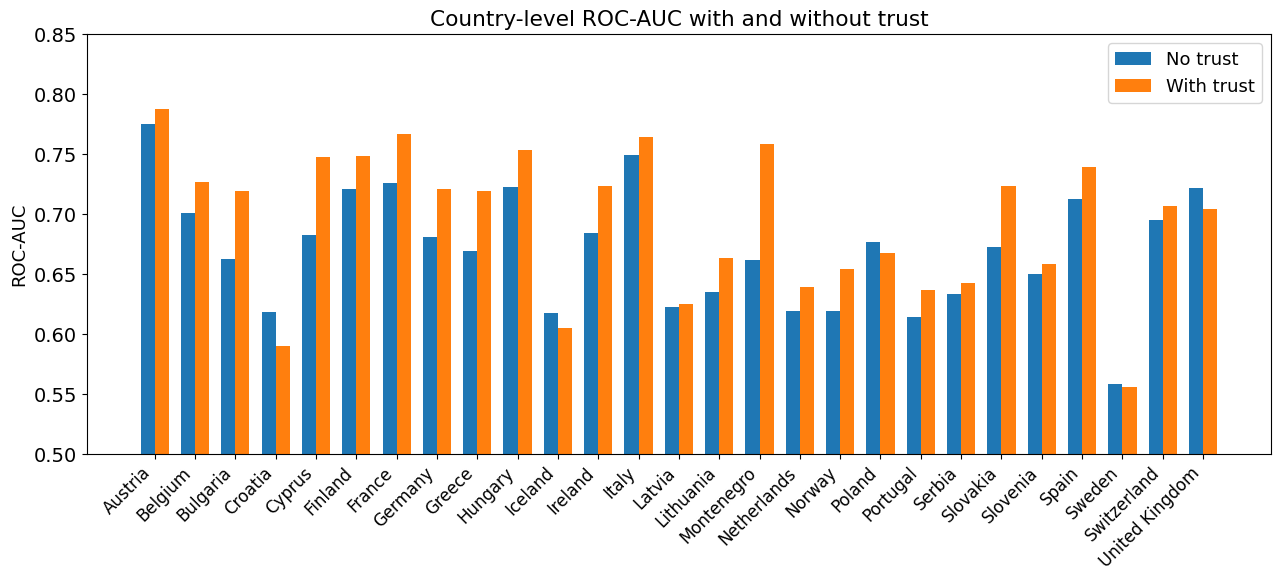

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# sortowanie po kraju (jeśli jeszcze nie jest posortowane)
df_plot = df_roc.sort_values("Country").reset_index(drop=True)

countries = df_plot["Country"]
x = np.arange(len(countries))

# teraz mamy zwykłe ROC_AUC z merge'a
base = df_plot["ROC_AUC_no_trust"].to_numpy()
with_trust = df_plot["ROC_AUC_trust"].to_numpy()
delta = df_plot["Delta"].to_numpy()  # opcjonalnie, jeśli gdzieś jeszcze chcesz użyć

bar_width = 0.35

plt.figure(figsize=(13, 6))

# słupki obok siebie: bez trustu i z trustem
plt.bar(
    x - bar_width/2,
    base,
    width=bar_width,
    label="No trust",
)

plt.bar(
    x + bar_width/2,
    with_trust,
    width=bar_width,
    label="With trust",
)

plt.xticks(x, countries, rotation=45, ha="right")
plt.ylabel("ROC-AUC")
plt.title("Country-level ROC-AUC with and without trust")
plt.ylim(0.5, 0.85)  # dostosuj jeśli trzeba

plt.legend(loc="upper right")
plt.tight_layout()

# zapis do pliku
plt.savefig("country_roc_auc_trust_vs_notrust.png", dpi=300, bbox_inches="tight")

plt.show()
